In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

In [3]:
######################################################################## UTILITY FUNCTIONS ######################################################################################

In [4]:
''' converts from '.csv' file to a numpy array '''
def extractData(s):
  data_df = pd.read_csv(s, header = None)
  return data_df.to_numpy()

In [5]:
''' seperates the first column of a np array as index / serial numbers'''
def seperateIndex(data):
  return data[:,1:]

In [7]:
#################################################################################################################################################################################

In [8]:
'''Calculates euclidian distance between a vector/matrix and a vector'''
def distance(X, x):
  diff = X - x
  dist = np.sqrt(np.sum(diff**2, axis = 1))
  return dist

In [9]:
'''Calcualtes inertia of model/cluster'''
def inertia(X, centroids_arr):
  inertia_ = []
  k = centroids_arr.shape[0]
  X = X[np.argsort(X[:,0])]
  for i in range(k):
    cluster = X[np.where(X[:,0]==i)[0], 1:]
    intra_cluster_dist = distance(cluster, centroids_arr[i])
    inertia_.append(np.sum(intra_cluster_dist))
  return inertia_

In [1]:
'''Calculates Dunn Index of a model as min(inter cluster distance)/max(intra cluster distance)'''
def dunnIndex(X, centroids_arr):
  k = centroids_arr.shape[0]

  X = X[np.argsort(X[:,0])]

  intra_cluster_dist = []
  for i in range(k):
    cluster = X[np.where(X[:,0]==i)[0], 1:]
    for j in range(cluster.shape[0]):
      dist = np.sqrt(np.sum(np.square((cluster[j] - centroids_arr[i]))))
      intra_cluster_dist.append(dist)

  inter_cluster_dist = []
  for i in range(k):
    for j in range(i+1, k):
      dist = np.sqrt(np.sum(np.square((centroids_arr[i] - centroids_arr[j]))))
      inter_cluster_dist.append(dist)

  dunn_index = min(inter_cluster_dist)/max(intra_cluster_dist)
  return dunn_index

In [10]:
def Kmeans (X, num_iter, k = 5):

  '''
  X        --> mxn design matrix of data points with n features and m points
  num_iter --> number of iterations
  k        --> number of clusters
  '''

  #initiating centroid and inertia list
  centroids = []
  inertia_list = []

  # adding extra column to store cluster number
  X = np.append(np.zeros((X.shape[0], 1)), X, axis = 1)

  #Takig K unique random indexes
  index = rd.sample(range(0,X.shape[0]), k)

  #picking random centroids
  for i in index :
    centroids.append(X[:,1:][i])
  centroids_arr = np.array(centroids)

  #clustering loop
  for i in range(num_iter):

    #calculating intra cluster distance for each data point
    for j in range (X.shape[0]):

      dist = distance(np.array(centroids), X[:,1:][j])
      #finding cluster index of nearest centroid 
      min_index = np.argmin(dist)

      #assigning corresponding cluster number to data point
      X[j][0] = min_index
    
    #Sorting points with same cluster number together
    X = X[np.argsort(X[:,0])]

    print(i)
    #Appending inertia of current iteration
    inertia_list.append((inertia(X, centroids_arr)))

    for i in range(k):
      # Updating after calculatinf new centroid
      centroids_arr[i] = np.mean(X[np.where(X[:,0]==i)[0], 1:], axis = 0)
  
  print(inertia_list[0])
  plt.plot(inertia_list[0])
  
  print(dunnIndex(X, centroids_arr))
  
  return X
    

In [11]:
X1 = extractData("/content/drive/MyDrive/WOC/Datasets/emnist-letters-train.csv")
X1 = seperateIndex(X1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[1354031.16834989, 29233865.89511132, 5937455.346774362, 2315571.7577236053, 7613263.43224516, 11198650.142156135, 2646463.601512381, 3919414.611547066, 4214559.073776849, 3296056.9127808646, 7265662.961959459, 2779364.2950068405, 2276022.446796966, 15181214.248326387, 6585674.789725447, 9387636.059981123, 3540975.0188622708, 6323286.372108724, 6441668.0115663465, 5658739.226596686, 2082498.0842687355, 27318245.07203192, 4441211.51367935, 12970361.681225788, 2712149.774494106, 10938948.098130476]
0.2244915204008792
(88800, 785)


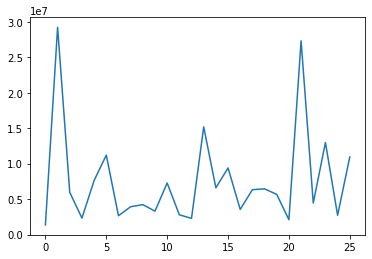

In [12]:
X = Kmeans(X1, 100, 26)